In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',None)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
def improt_data(lujing,code):
    data = pd.read_csv(lujing,encoding =code)
    return data

def mean(data,a):
    print('平均值',data[a].mean())
    print('方差',data[a].std())

def box_polt(a):
    zhongwei = a.median()
    mean = a.mean()
    q1 = a.quantile(0.25)
    q2 = a.quantile(0.5)
    q3 = a.quantile(0.75)
    q4 = a.quantile(1)
    iqr = q3-q1
    upper = q3 + 1.5*iqr
    print('--------------')
    print('中位:',zhongwei)
    print('平均:',mean)    
    print('--------------') 
    print('50% :',q2)
    print('75% :',q3)
    print('100%:',upper)
    print('max :',q4)
    print('--------------')
    list_ = []
    list_.append(q2)
    list_.append(q3)
    list_.append(upper)
    return list_

def data_order(a,b):
#     lujing = r'C:/Users/Administrator/Datas/爱尚花语/艾尚花语指标模型/data/Ddata.csv'
#     code = 'gbk'
    data = improt_data(lujing,code)
    if b == 0:
        df_hsh_max = data[data['曝光人数'] > a]
        k = df_hsh_max
        return k
    elif a == 0:
        df_hsh_min = data[data['曝光人数'] < b  ]
        k = df_hsh_min
        return k
    else:
        df_hsh_ = data[(data['曝光人数'] >=a) & (data['曝光人数'] <=b) ]
        k = df_hsh_
        return k 
    
def linear(x,y):
    from sklearn import metrics
    import numpy as np
    from sklearn.model_selection import train_test_split
    from sklearn import linear_model
    X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1)
    print('数据分集查看')
    print ('X训练',X_train.shape)
    print ('y训练',y_train.shape)
    print ('X测试',X_test.shape)
    print ('y测试',y_test.shape)
    print('-------------')
    linear =  linear_model.LinearRegression()
    linear.fit(X_train,y_train)
    print('线性结截距:', linear.intercept_)
    print ('回归系数',linear.coef_)
    y_pred = linear.predict(X_test)
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

def line_bg_rd(x1,y1):   
    x = x1
    y = y1
    data_min = data_order(x,y)
    baoguang = data_min['曝光人数'].values.reshape(-1,1)
    jindian = data_min['入店人数'].values.reshape(-1, 1)
    linear(baoguang,jindian)

def drop(data):
    a = data
    a.drop_duplicates(subset='商家ID',inplace = True,keep = 'last')
    print(a['商家ID'].count())


def cluster_look(data,list__):
    list_ = list__
    x = 0
    s = ['max','one','two','min']
    for i in list_:
        df = data[data['cluster'] == i]
        print( s[x] +'-等级的门店数量:' + str(df['cluster'].count()))    
        x = x+1


In [9]:
lujing = r'C:\Users\Administrator\Datas\艾尚花语\艾尚月季度数据\7月份数据\Data/门店数据(D).csv'
code = 'gbk'
data = improt_data(lujing,code)

In [10]:
# data

e:\python\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 26333 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\python\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 20809 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\python\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 20154 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\python\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\python\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 26333 missing from current font.
  font.set_text(s, 0, flags=flags)
e:\python\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 20809 missing from current font.
  font.set_text(s, 0, flags=flags)
e:\python\lib\site-packages\matplotlib\backe

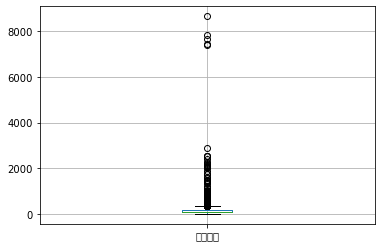

In [11]:
data.boxplot('曝光人数')

In [12]:
a = data['曝光人数']
list_ = box_polt(a)
q1 = list_[0]
q2 = list_[1]
q3 = list_[2]
q04 =  0


--------------
中位: 104.0
平均: 159.0217255065803
--------------
50% : 104.0
75% : 178.0
100%: 349.0
max : 8656.0
--------------


In [13]:
print('min')
line_bg_rd(q04,q1)
print('##################################')
print('one')
line_bg_rd(q1,q2)
print('##################################')
print('two')
line_bg_rd(q2,q3)
print('##################################')
print('max')
line_bg_rd(q3,q04)

min
数据分集查看
X训练 (1786, 1)
y训练 (1786, 1)
X测试 (596, 1)
y测试 (596, 1)
-------------
线性结截距: [-0.42055082]
回归系数 [[0.0438371]]
RMSE: 2.139891997970251
##################################
one
数据分集查看
X训练 (907, 1)
y训练 (907, 1)
X测试 (303, 1)
y测试 (303, 1)
-------------
线性结截距: [0.73412773]
回归系数 [[0.02760799]]
RMSE: 4.113023385463745
##################################
two
数据分集查看
X训练 (706, 1)
y训练 (706, 1)
X测试 (236, 1)
y测试 (236, 1)
-------------
线性结截距: [1.38281823]
回归系数 [[0.02138347]]
RMSE: 4.878717537550916
##################################
max
数据分集查看
X训练 (201, 1)
y训练 (201, 1)
X测试 (67, 1)
y测试 (67, 1)
-------------
线性结截距: [7.59338288]
回归系数 [[0.01022721]]
RMSE: 7.307188513982549


In [14]:
data_max = data_order(q3,q04)
data_one = data_order(q2,q3)
data_two = data_order(q1,q2)
data_min = data_order(q04,q1)


In [16]:
data_max

,开始日期,结束日期,商家ID,商家名称,运营组,省份,城市,是否新增商家,首次上线日期,门店在线状态,（日均）预设营业时长（h）,（日均）在线营业时长（h）,曝光人数,入店人数,下单人数,下单新客人数,入店转化率,下单转化率,推单数,有效订单数,原价交易额,实付交易额,商家补贴金额,商家原因取消订单数,商家拒单数,商家超时未接单数,商家取消不告知用户订单数,缺货导致退款订单数,商家少送错送导致用户退款订单数,商家质量问题导致用户退款订单数,配送原因取消订单数,拣货超时订单数,使用间或完成按钮订单数,平均骑手到店等待时间（min）,平均骑手送货时长（min）,IM会话数,IM回复数,IM回复率,IM1分钟回复数,差评订单数,投诉订单数,平均商家评分,平均商品评分,平均配送评分,平均配送时长（min）,资质类型（仅药品）,资质有效期（仅药品）
61,20200731,20200731,9024278,友新意鲜花坊鲜花礼品鲜花店,鲜花组,陕西省,西安,否,20200508,在线,18.0,18.0,755,17,1,1,2.25,5.88%,1,1,207.0,111.4,100.6,0,0,0,0,0,0,0,0,0,1,0,0,1,1,100.0,1,0,0,4.6,4.6,5.0,0.0,NaN,NaN
247,20200731,20200731,9043317,花坞鲜花礼品鲜花店,鲜花组,福建省,福州,否,20200508,在线,18.0,18.0,718,12,0,0,1.67,0%,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,5.0,5.0,0.0,0.0,NaN,NaN
1115,20200731,20200731,9288258,花开相爱鲜花礼品鲜花店,鲜花组,山西省,吕梁,否,20200613,在线,24.0,24.0,396,23,1,1,5.81,4.35%,1,1,239.0,74.0,170.0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0.0,0,0,0,5.0,5.0,5.0,0.0,NaN,NaN
1363,20200731,20200731,9295286,婉苑鲜花婚庆礼品鲜花店,鲜花组,黑龙江省,齐齐哈尔,否,20200611,在线,18.0,18.0,367,26,5,5,7.08,19.23%,5,5,1215.0,426.0,809.0,0,0,0,0,0,0,0,0,0,5,0,0,2,2,100.0,0,0,0,5.0,5.0,5.0,0.0,NaN,NaN
1639,20200728,20200728,9314608,欣然鲜花礼品鲜花店,鲜花组,河北省,唐山,否,20200612,在线,24.0,24.0,425,1,0,0,0.24,0%,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0.0,0.0,0.0,0.0,NaN,NaN
1810,20200729,20200729,9322697,锦上添花鲜花礼品鲜花店,鲜花组,吉林省,长春,否,20200617,在线,12.0,12.0,367,10,0,0,2.72,0%,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,5.0,5.0,5.0,0.0,NaN,NaN
1841,20200729,20200729,9323842,花无缺鲜花礼品鲜花店,鲜花组,内蒙古自治区,锡林郭勒盟,否,20200617,在线,13.0,12.0,377,8,0,0,2.12,0%,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0.0,0.0,0.0,0.0,NaN,NaN
1892,20200718,20200718,9338708,恒海鲜花礼品鲜花店,鲜花组,山东省,滨州,否,20200617,在线,13.0,13.0,358,3,0,0,0.84,0%,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,5.0,5.0,5.0,0.0,NaN,NaN
2271,20200725,20200725,9352076,花仙子（鲜花店）,鲜花组,陕西省,西安,否,20200618,在线,24.0,23.9,424,14,0,0,3.30,0%,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,5.0,5.0,5.0,0.0,NaN,NaN
2347,20200708,20200708,9360432,大自然花艺（艾尚花语鲜花店）,鲜花组,湖北省,黄冈,否,20200619,在线,12.0,12.0,987,0,0,0,0.00,0%,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0.0,0.0,0.0,0.0,NaN,NaN


In [17]:
drop(data_max)
drop(data_one)
drop(data_two)
drop(data_min)

39
106
144
156


In [19]:
data_max

,开始日期,结束日期,商家ID,商家名称,运营组,省份,城市,是否新增商家,首次上线日期,门店在线状态,（日均）预设营业时长（h）,（日均）在线营业时长（h）,曝光人数,入店人数,下单人数,下单新客人数,入店转化率,下单转化率,推单数,有效订单数,原价交易额,实付交易额,商家补贴金额,商家原因取消订单数,商家拒单数,商家超时未接单数,商家取消不告知用户订单数,缺货导致退款订单数,商家少送错送导致用户退款订单数,商家质量问题导致用户退款订单数,配送原因取消订单数,拣货超时订单数,使用间或完成按钮订单数,平均骑手到店等待时间（min）,平均骑手送货时长（min）,IM会话数,IM回复数,IM回复率,IM1分钟回复数,差评订单数,投诉订单数,平均商家评分,平均商品评分,平均配送评分,平均配送时长（min）,资质类型（仅药品）,资质有效期（仅药品）
61,20200731,20200731,9024278,友新意鲜花坊鲜花礼品鲜花店,鲜花组,陕西省,西安,否,20200508,在线,18.0,18.0,755,17,1,1,2.25,5.88%,1,1,207.0,111.4,100.6,0,0,0,0,0,0,0,0,0,1,0,0,1,1,100.0,1,0,0,4.6,4.6,5.0,0.0,NaN,NaN
247,20200731,20200731,9043317,花坞鲜花礼品鲜花店,鲜花组,福建省,福州,否,20200508,在线,18.0,18.0,718,12,0,0,1.67,0%,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,5.0,5.0,0.0,0.0,NaN,NaN
1115,20200731,20200731,9288258,花开相爱鲜花礼品鲜花店,鲜花组,山西省,吕梁,否,20200613,在线,24.0,24.0,396,23,1,1,5.81,4.35%,1,1,239.0,74.0,170.0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0.0,0,0,0,5.0,5.0,5.0,0.0,NaN,NaN
1363,20200731,20200731,9295286,婉苑鲜花婚庆礼品鲜花店,鲜花组,黑龙江省,齐齐哈尔,否,20200611,在线,18.0,18.0,367,26,5,5,7.08,19.23%,5,5,1215.0,426.0,809.0,0,0,0,0,0,0,0,0,0,5,0,0,2,2,100.0,0,0,0,5.0,5.0,5.0,0.0,NaN,NaN
1639,20200728,20200728,9314608,欣然鲜花礼品鲜花店,鲜花组,河北省,唐山,否,20200612,在线,24.0,24.0,425,1,0,0,0.24,0%,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0.0,0.0,0.0,0.0,NaN,NaN
1810,20200729,20200729,9322697,锦上添花鲜花礼品鲜花店,鲜花组,吉林省,长春,否,20200617,在线,12.0,12.0,367,10,0,0,2.72,0%,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,5.0,5.0,5.0,0.0,NaN,NaN
1841,20200729,20200729,9323842,花无缺鲜花礼品鲜花店,鲜花组,内蒙古自治区,锡林郭勒盟,否,20200617,在线,13.0,12.0,377,8,0,0,2.12,0%,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0.0,0.0,0.0,0.0,NaN,NaN
1892,20200718,20200718,9338708,恒海鲜花礼品鲜花店,鲜花组,山东省,滨州,否,20200617,在线,13.0,13.0,358,3,0,0,0.84,0%,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,5.0,5.0,5.0,0.0,NaN,NaN
2271,20200725,20200725,9352076,花仙子（鲜花店）,鲜花组,陕西省,西安,否,20200618,在线,24.0,23.9,424,14,0,0,3.30,0%,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,5.0,5.0,5.0,0.0,NaN,NaN
2347,20200708,20200708,9360432,大自然花艺（艾尚花语鲜花店）,鲜花组,湖北省,黄冈,否,20200619,在线,12.0,12.0,987,0,0,0,0.00,0%,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0.0,0.0,0.0,0.0,NaN,NaN


e:\python\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 26333 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\python\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 20809 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\python\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 20154 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\python\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\python\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 20837 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\python\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 24215 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\python\lib\site-packages\matplotlib\b

e:\python\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 26333 missing from current font.
  font.set_text(s, 0, flags=flags)
e:\python\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 20809 missing from current font.
  font.set_text(s, 0, flags=flags)
e:\python\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 20154 missing from current font.
  font.set_text(s, 0, flags=flags)
e:\python\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0, flags=flags)
e:\python\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 20837 missing from current font.
  font.set_text(s, 0, flags=flags)
e:\python\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 24215 missing from current font.
  font.set_text(s, 0, flags=flags)


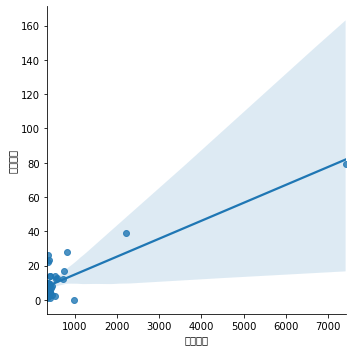

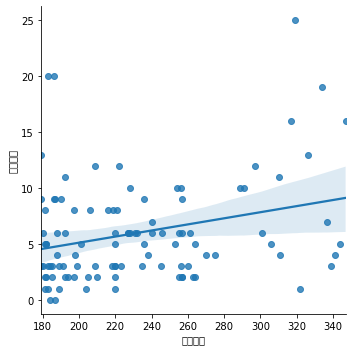

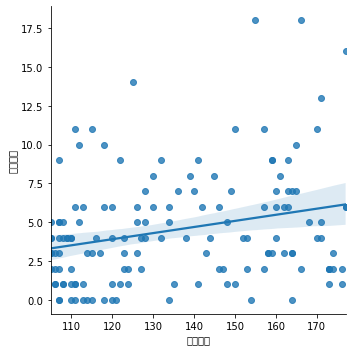

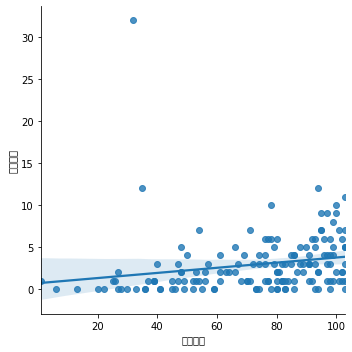

In [42]:
sns.lmplot(x="曝光人数", y="入店人数",data=data_max,fit_reg=True)
sns.lmplot(x="曝光人数", y="入店人数",data=data_one,fit_reg=True)
sns.lmplot(x="曝光人数", y="入店人数",data=data_two,fit_reg=True)
sns.lmplot(x="曝光人数", y="入店人数",data=data_min,fit_reg=True)

In [43]:
data_8000 = data[data['曝光人数'] > 6000]

In [44]:
data_8000.drop_duplicates(subset='商家ID',inplace=False,keep='last')

,开始日期,结束日期,商家ID,商家名称,运营组,省份,城市,是否新增商家,首次上线日期,门店在线状态,（日均）预设营业时长（h）,（日均）在线营业时长（h）,曝光人数,入店人数,下单人数,下单新客人数,入店转化率,下单转化率,推单数,有效订单数,原价交易额,实付交易额,商家补贴金额,商家原因取消订单数,商家拒单数,商家超时未接单数,商家取消不告知用户订单数,缺货导致退款订单数,商家少送错送导致用户退款订单数,商家质量问题导致用户退款订单数,配送原因取消订单数,拣货超时订单数,使用间或完成按钮订单数,平均骑手到店等待时间（min）,平均骑手送货时长（min）,IM会话数,IM回复数,IM回复率,IM1分钟回复数,差评订单数,投诉订单数,平均商家评分,平均商品评分,平均配送评分,平均配送时长（min）,资质类型（仅药品）,资质有效期（仅药品）
1821,20200709,20200709,9323842,花无缺鲜花店,鲜花组,内蒙古自治区,锡林郭勒盟,否,20200617,在线,13.0,12.0,7847,112,3,3,1.43,2.68%,3,3,597.0,222.0,390.0,0,0,0,0,0,0,0,0,0,3,0,0,1,1,100.0,0,0,0,0.0,0.0,0.0,0.0,NaN,NaN
4467,20200731,20200731,9529764,花之坊鲜花礼品鲜花店,鲜花组,新疆维吾尔自治区,哈密地区,否,20200717,在线,13.0,12.4,7416,79,2,1,1.07,2.53%,2,1,88.0,80.0,13.0,1,0,1,0,0,0,0,0,0,1,0,0,1,1,100.0,0,0,0,0.0,0.0,0.0,0.0,NaN,NaN
